In [67]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import numpy
numpy.set_printoptions(threshold=np.inf)

%matplotlib inline

In [68]:
#Carregando arquivos com 5000 linhas e 400 colunas de features (dimensoes)
data = np.loadtxt("ex3data2.txt", delimiter=',')

X = data[ : 306,  : -1]
y = data[ : 306,  -1]
y = y.reshape((306,1))

XTest = data[ : 100,  : -1]
yTest = data[ : 100,  -1]
yTest = yTest.reshape((100,1))

XValid = data[ : 100,  : -1]
yValid = data[ : 100,  -1]
yValid = yValid.reshape((100,1))


In [69]:
#definindo informações importantes

num_examples = int(306)
features = int(13) 
classes = 1 
 
epsilon = 0.001 
reg_lambda = 0.01

In [70]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    return z2

In [97]:
def build_model(nodes_oculta, num_passes=1000):
     
    np.random.seed(0)
    W1 = np.random.randn(features, nodes_oculta) / np.sqrt(features)
    b1 = np.zeros((1, nodes_oculta))
    W2 = np.random.randn(nodes_oculta, classes) / np.sqrt(nodes_oculta)
    b2 = np.zeros((1, classes))
 
    # saida
    model = {}
    list_erros = []
    list_erros_eval = []
    last_error = 1000
    
    # Gradiente descendente.
    for i in range(0, num_passes):
        
        np.random.shuffle(X)
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = 1/(1 + np.exp(-z1))
        z2 = a1.dot(W2) + b2
        probs = z2

        # calculo erro
        erro = y - probs
        
        # Backpropagation
        delta3 = probs
        dW2 = (a1.T).dot(erro)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * ( 1/(1 + np.exp(-z1)) *  ( 1 - ( 1/(1 + np.exp(-z1)) ) ) )
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # regularizacao
        #dW2 += reg_lambda * W2
        #dW1 += reg_lambda * W1
 
        # Gradiente descendente atualizacao
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        erro_eval = yValid - predict(model, XValid)
        
        erro_epoca = np.sum(np.sum(np.power(erro, np.full(erro.shape, 2)), axis=0)/erro.shape[1])/erro.shape[0]
        
        erro_eval_epoca = np.sum(np.sum(np.power(erro_eval, np.full(erro_eval.shape, 2)), axis=0)/erro_eval.shape[1])/erro_eval.shape[0]
        
        list_erros.append(erro_epoca)
        list_erros_eval.append(erro_eval_epoca)
        
        print('Epoch:  {}\nErro: {}\nErro Eval: {}'.format(str(i), str(erro_epoca), str(erro_eval_epoca)))
        
        #if last_error < erro_eval_epoca :
        #    break
        #else:
        #    last_error = erro_eval_epoca
     
    return model, list_erros, list_erros_eval

In [98]:
model, list_erros, list_erros_eval = build_model(int(5), num_passes=10)

Epoch:  0
Erro: 723.763510671
Erro Eval: 1082.16514785
Epoch:  1
Erro: 1427.97589637
Erro Eval: 512.277683614
Epoch:  2
Erro: 1756.23186312
Erro Eval: 914.962130616
Epoch:  3
Erro: 2457.7619933
Erro Eval: 1439.8325425
Epoch:  4
Erro: 3281.47808837
Erro Eval: 2086.88891926
Epoch:  5
Erro: 4227.38014831
Erro Eval: 2856.1312609
Epoch:  6
Erro: 5295.46817313
Erro Eval: 3747.55956742
Epoch:  7
Erro: 6485.74216283
Erro Eval: 4761.17383882
Epoch:  8
Erro: 7798.20211741
Erro Eval: 5896.97407511
Epoch:  9
Erro: 9232.84803687
Erro Eval: 7154.96027627


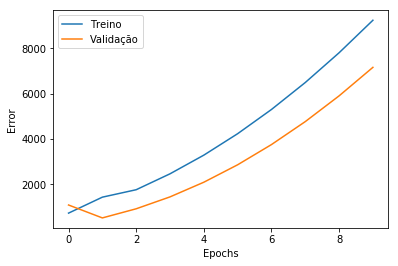

In [99]:
plt.plot(np.arange(len(list_erros)), list_erros, label="Treino")
plt.plot(np.arange(len(list_erros_eval)), list_erros_eval, label="Validação")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()